In [6]:
# ======================================
# 1. Import Libraries
# ======================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [9]:
# ======================================
# 2. Load Dataset
# ======================================
data = pd.read_csv("./data/normalized_features.csv")

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

print(X.shape)
print(y.shape)

(3843, 1420)
(3843,)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [44]:
# ======================================
# 3. DNN Model Function
# ======================================
def create_dnn(input_dim, num_classes):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [45]:
print(X_train.shape[1])
print(y_train.shape[0])

1420
3074


In [46]:
# ======================================
# target variable has multiple classes 
# change the target variable accordingly
from tensorflow.keras.utils import to_categorical
num_classes = to_categorical(y_train)
num_classes.shape[0]

3074

In [47]:
# ======================================
# 4. 1️⃣ Simple DNN
# ======================================
simple_dnn = create_dnn(X_train.shape[1], num_classes.shape[0])

history_simple = simple_dnn.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/20


c:\Users\USER\miniconda3\envs\env_deep_learning\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1723 - loss: 6.0749 - val_accuracy: 0.5220 - val_loss: 2.0035
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5500 - loss: 1.8754 - val_accuracy: 0.7431 - val_loss: 1.0606
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7181 - loss: 1.0548 - val_accuracy: 0.8244 - val_loss: 0.6859
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8221 - loss: 0.6944 - val_accuracy: 0.8683 - val_loss: 0.4967
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8574 - loss: 0.4948 - val_accuracy: 0.9106 - val_loss: 0.3395
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9003 - loss: 0.3766 - val_accuracy: 0.9268 - val_loss: 0.2950
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9148 - loss: 0.3106 - val_accuracy: 0.9382 - val_loss: 0.2446
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9316 - loss: 0.2423 - val_accuracy: 0.9415 - val_loss: 0.2266
Epo

In [50]:
# Evaluate Simple DNN
from sklearn.metrics import accuracy_score
#y_pred_simple = (simple_dnn.predict(X_test) > 0.5).astype(int)
y_pred_prob = simple_dnn.predict(X_test)
y_pred_simple = np.argmax(y_pred_prob, axis=1)
acc_simple = accuracy_score(y_test, y_pred_simple)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [51]:
# ======================================
# 5. 2️⃣ Feature Selection + DNN
# ======================================
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=10)
X_train_fs = selector.fit_transform(X_train, y_train)
X_test_fs = selector.transform(X_test)

c:\Users\USER\miniconda3\envs\env_deep_learning\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [   1    2    3    4    5    7    8    9   10   11   13   14   15   16
   17   19   20   21   22   23   25   26   27   28   29   31   32   33
   34   35   37   38   39   40   41   43   44   45   46   47   49   50
   51   52   53  217  218  219  220  221  223  224  225  226  227  229
  230  231  232  233  235  236  237  238  239  241  242  243  244  245
  247  248  249  250  251  253  254  255  256  257  259  260  261  262
  263  265  266  267  268  269  864  865  866  867  868  869 1104 1105
 1106 1107 1108 1109 1110 1111 1112 1113 1114 1115 1176 1177 1178 1179
 1180 1181 1182 1183 1184 1185 1186 1187 1190 1192 1193] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\USER\miniconda3\envs\env_deep_learning\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarnin

In [53]:
fs_dnn = create_dnn(X_train_fs.shape[1], num_classes.shape[0])

history_fs = fs_dnn.fit(
    X_train_fs, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/20


c:\Users\USER\miniconda3\envs\env_deep_learning\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0966 - loss: 7.4409 - val_accuracy: 0.2407 - val_loss: 3.5040
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2785 - loss: 3.2100 - val_accuracy: 0.3496 - val_loss: 2.5618
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3877 - loss: 2.4289 - val_accuracy: 0.4683 - val_loss: 2.0279
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4638 - loss: 2.0165 - val_accuracy: 0.4797 - val_loss: 1.7461
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4919 - loss: 1.7635 - val_accuracy: 0.5545 - val_loss: 1.5095
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5255 - loss: 1.6326 - val_accuracy: 0.5659 - val_loss: 1.4039
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5708 - loss: 1.4782 - val_accuracy: 0.6146 - val_loss: 1.3049
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5848 - loss: 1.3949 - val_accuracy: 0.6000 - val_loss: 1.2647
Epo

In [59]:
y_pred_prob_fs = fs_dnn.predict(X_test_fs)
y_pred_fs = np.argmax(y_pred_prob_fs, axis=1)
acc_fs = accuracy_score(y_test, y_pred_fs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [60]:
# ======================================
# 6. 3️⃣ PCA + DNN
# ======================================
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [61]:
pca_dnn = create_dnn(X_train_pca.shape[1], num_classes.shape[0])

history_pca = pca_dnn.fit(
    X_train_pca, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/20


c:\Users\USER\miniconda3\envs\env_deep_learning\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1102 - loss: 6.5043 - val_accuracy: 0.3350 - val_loss: 2.8366
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3809 - loss: 2.5766 - val_accuracy: 0.5967 - val_loss: 1.7135
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6115 - loss: 1.6661 - val_accuracy: 0.7496 - val_loss: 1.0670
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7494 - loss: 1.0612 - val_accuracy: 0.8407 - val_loss: 0.7048
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8284 - loss: 0.6919 - val_accuracy: 0.8813 - val_loss: 0.5137
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8752 - loss: 0.5199 - val_accuracy: 0.9057 - val_loss: 0.3840
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8968 - loss: 0.4247 - val_accuracy: 0.9301 - val_loss: 0.3046
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9145 - loss: 0.3364 - val_accuracy: 0.9431 - val_loss: 0.2736
Epo

In [62]:
y_pred_prob_pca = pca_dnn.predict(X_test_pca)
y_pred_pca = np.argmax(y_pred_prob_pca, axis=1)
acc_pca = accuracy_score(y_test, y_pred_pca)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


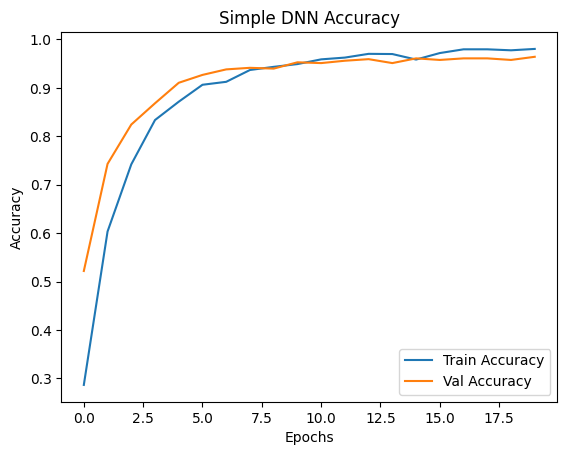

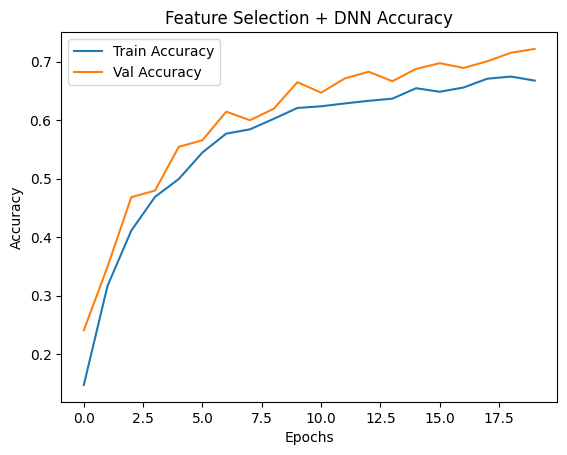

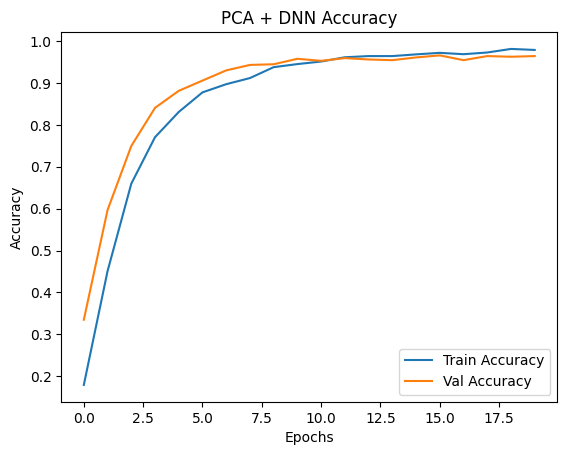

In [63]:
# ======================================
# 7. 4️⃣ Training & Validation Plots
# ======================================
plt.figure()
plt.plot(history_simple.history['accuracy'], label='Train Accuracy')
plt.plot(history_simple.history['val_accuracy'], label='Val Accuracy')
plt.title('Simple DNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.figure()
plt.plot(history_fs.history['accuracy'], label='Train Accuracy')
plt.plot(history_fs.history['val_accuracy'], label='Val Accuracy')
plt.title('Feature Selection + DNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.figure()
plt.plot(history_pca.history['accuracy'], label='Train Accuracy')
plt.plot(history_pca.history['val_accuracy'], label='Val Accuracy')
plt.title('PCA + DNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


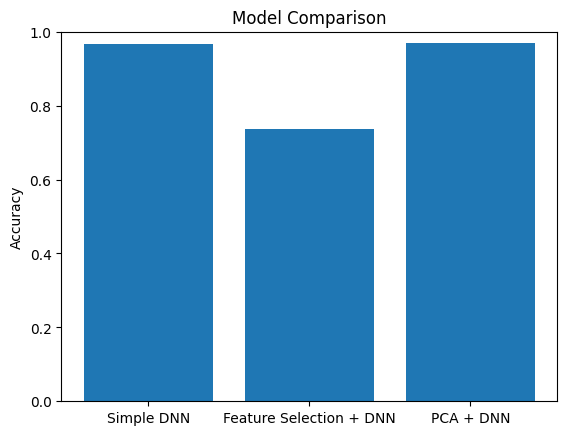

In [64]:
# ======================================
# 8. 5️⃣ Accuracy Comparison Plot
# ======================================
models = ['Simple DNN', 'Feature Selection + DNN', 'PCA + DNN']
accuracies = [acc_simple, acc_fs, acc_pca]

plt.figure()
plt.bar(models, accuracies)
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0, 1)
plt.show()

In [31]:
# ======================================
# 9. Print Results
# ======================================
print("Final Test Accuracies:")
print(f"Simple DNN               : {acc_simple:.4f}")
print(f"Feature Selection + DNN  : {acc_fs:.4f}")
print(f"PCA + DNN                : {acc_pca:.4f}")


Final Test Accuracies:
Simple DNN               : 0.0195
Feature Selection + DNN  : 0.0195
PCA + DNN                : 0.0195
